In [1]:
# Load data ke dalam data frame 
import pandas as pd

# spesifikasi encoding diperlukan karena data tidak menggunakan UTF-8
df = pd.read_csv('allreview_clean.csv', encoding='latin-1') 

df.head()

,review_tokens_stemmed,sentimen,classified_text,tweet_text,sentence_score,max_positive,max_negative,kelas
0,kulit kerut,"{'classified_text': 'kulit kerut [-2]', 'tweet...",kulit kerut [-2],kulit kerut,['kulit kerut [-2]'],1,-2,negatif
1,tipe kulit kering,"{'classified_text': 'tipe kulit kering', 'twee...",tipe kulit kering,tipe kulit kering,['tipe kulit kering'],1,-1,netral
2,bagus banget lip tint nya warna bagus kemas ge...,{'classified_text': 'bagus [5] banget lip tint...,bagus [5] banget lip tint nya warna bagus [4] ...,bagus banget lip tint nya warna bagus kemas g...,['bagus [5] banget lip tint nya warna bagus [4...,5,-1,positif
3,expire kirim cepat cocok guna sesuai instruksi,{'classified_text': 'expire kirim cepat [4] co...,expire kirim cepat [4] cocok [4] guna sesuai [...,expire kirim cepat cocok guna sesuai instruksi,['expire kirim cepat [4] cocok [4] guna sesuai...,4,-1,positif
4,no review found,"{'classified_text': 'no review found', 'tweet_...",no review found,no review found,['no review found'],1,-1,netral


In [2]:
# Drop 3 kolom terakhir yang tidak digunakan dengan fungsi iloc
df = df.drop(df.iloc[:,1:7], axis=1)

# Cek data teratas
df.head()

,review_tokens_stemmed,kelas
0,kulit kerut,negatif
1,tipe kulit kering,netral
2,bagus banget lip tint nya warna bagus kemas ge...,positif
3,expire kirim cepat cocok guna sesuai instruksi,positif
4,no review found,netral


In [3]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'review_tokens_stemmed' : 'Review',
    'kelas' : 'Sentiment'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# Cek data teratas
df.head()

,Review,Sentiment
0,kulit kerut,negatif
1,tipe kulit kering,netral
2,bagus banget lip tint nya warna bagus kemas ge...,positif
3,expire kirim cepat cocok guna sesuai instruksi,positif
4,no review found,netral


In [4]:
# Cek jumlah data per kelas
print(df['Sentiment'].value_counts())
print('\n')

# Cek kelengkapan data
print(df.info())
print('\n')

# Cek statistik deskriptif
print(df.describe())

positif    1136
netral      351
negatif     133
Name: Sentiment, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1620 non-null   object
 1   Sentiment  1620 non-null   object
dtypes: object(2)
memory usage: 25.4+ KB
None


                 Review Sentiment
count              1620      1620
unique             1500         3
top     coba moga cocok   positif
freq                 15      1136


In [5]:
# Data untuk label
new_labels = {
    'negatif' : 0,
    'netral' : 1,
    'positif' : 2
}

# Encode label (mengubah label dari spam dan ham menjadi 1 dan 0)
df['Sentiment'] = df['Sentiment'].map(new_labels)

# Cek data teratas
df.head()

,Review,Sentiment
0,kulit kerut,0
1,tipe kulit kering,1
2,bagus banget lip tint nya warna bagus kemas ge...,2
3,expire kirim cepat cocok guna sesuai instruksi,2
4,no review found,1


In [6]:
# Memisahkan fitur dengan label
X = df['Review'].values
y = df['Sentiment'].values

In [8]:
# untuk membuat plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Confusion Matrix
def conf_matrix(cm):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion Matrix - Test Data Positive dan Negative')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

In [9]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

def roccurve(Y, y_pred):
  fpr, tpr, thresholds = roc_curve(Y, y_pred)
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  
  # create the axis of thresholds (scores)
  ax2 = plt.gca().twinx()
  ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
  ax2.set_ylabel('Threshold',color='r')
  ax2.set_ylim([thresholds[-1],thresholds[0]])
  ax2.set_xlim([fpr[0],fpr[-1]])
  plt.show()

In [10]:
# Ekstraksi fitur
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisiasi TfidfVectorizer
bow = TfidfVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_vect = bow.fit_transform(X).toarray()

In [11]:
# untuk operasi matematika
import numpy as np
# untuk menghitung waktu prediksi
import time
# untuk mengurutkan matric score
from collections import OrderedDict
# untuk K-Fold cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# untuk algoritma naive bayes, svm dan metrics
from sklearn.naive_bayes import MultinomialNB

# untuk mengurutkan matric score
from collections import OrderedDict

# untuk melakukan teknik resampling data yang tidak seimbang dan pipeline
from imblearn.over_sampling import SMOTE
from imblearn import pipeline


def kfoldcv(classifier, X, Y, folds, print_all_scores=False, timed=True):

    # memulai timer
    mulai_time = time.time()

    # untuk mengecek feature matrix dan vector label  dengan format ndarray untuk mencegah masalah saat scalar indexing
    if type(X) is not np.ndarray:
        X = np.array(X)
    if type(Y) is not np.ndarray:
        Y = np.array(Y)

    y_pred = cross_val_predict(classifier, X, Y, cv=folds)
    cm = confusion_matrix(Y, y_pred)


    # print waktu yang dibutuhkan untuk komputasi
    if timed:
        print ("Waktu yang dibutuhkan: %0.2fmins." % ((time.time() - mulai_time)/60))
    
    conf_matrix(cm)
    print(classification_report(Y, y_pred))
    print("")
    print('Total Data Prediksi Negative ',sum(y_pred == 0))
    print('Total Data Prediksi Positive ',sum(y_pred == 1))
    print('Total Data Negative ',sum(Y == 0))
    print('Total Data Positive ',sum(Y == 1))
    print('Total Data ',len(Y))
    print("")    
    
    #df_tfidf = pd.DataFrame(X,columns=tfidfconverter.get_feature_names())
    #df_tfidf['Sentiment'] = le.inverse_transform(Y)
    #df_tfidf['Sentiment_Pred'] = le.inverse_transform(y_pred)
        
    # export model
    #classifier.fit(X,Y)
    #pickle.dump(classifier, open('model1.pkl','wb'))
    # Copy ke Gdrive
    #!cp model1.pkl /content/gdrive/My\ Drive/'Colab Notebooks'/'Sentiment Analysis'/
    #!ls /content/gdrive/My\ Drive/'Colab Notebooks'/'Sentiment Analysis'/

In [12]:
def kfoldcv_SMOTE(classifier, X, Y, folds, print_all_scores=False, timed=True):
    
    # untuk mengecek feature matrix dan vector label  dengan format ndarray untuk mencegah masalah saat scalar indexing
    if type(X) is not np.ndarray:
        X = np.array(X)
    if type(Y) is not np.ndarray:
        Y = np.array(Y)

    # Penggunaan SMOTEE
    sm_combine = SMOTE(sampling_strategy='minority',random_state=10)
    #sm_combine = SMOTEENN(enn=EditedNearestNeighbours(),random_state=2,ratio='auto',smote=SMOTE())

    Total_Y0 = sum(Y == 0)
    Total_Y1 = sum(Y == 1)
    X_over, Y_over = sm_combine.fit_sample(X, Y)
    
    classifier = pipeline.make_pipeline(sm_combine,classifier)

    y_pred = cross_val_predict(classifier, X_over, Y_over, cv=folds)
    cm = confusion_matrix(Y_over, y_pred)
    
    conf_matrix(cm)

    print(classification_report(Y_over, y_pred))
    print("")
    print('Total Data Negative sebelum SMOTE ',Total_Y0)
    print('Total Data Positive sebelum SMOTE ',Total_Y1)
    print('Total Data sebelum SMOTE ',Total_Y0+Total_Y1)
    print("")
    print('Total Data Prediksi Negative ',sum(y_pred == 0))
    print('Total Data Prediksi Positive ',sum(y_pred == 1))
    print('Total Data Negative sesudah SMOTE ',sum(Y == 0))
    print('Total Data Positive sesudah SMOTE ',sum(Y == 1))
    print('Total Data sesudah SMOTE ',len(Y_over))
    print("")


In [13]:
def algo_nb():
  clr_nb = MultinomialNB()  
  return clr_nb

Algoritma Naive Bayes
Waktu yang dibutuhkan: 0.01mins.


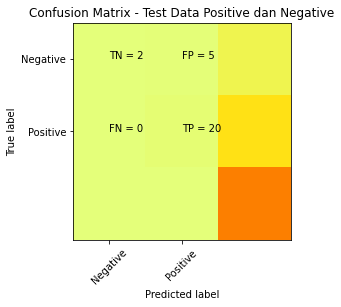

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       133
           1       0.71      0.06      0.11       351
           2       0.71      1.00      0.83      1136

    accuracy                           0.71      1620
   macro avg       0.81      0.36      0.32      1620
weighted avg       0.74      0.71      0.61      1620


Total Data Prediksi Negative  2
Total Data Prediksi Positive  28
Total Data Negative  133
Total Data Positive  351
Total Data  1620



ValueError: multiclass format is not supported

In [14]:
print("Algoritma Naive Bayes")
kfoldcv(classifier=algo_nb(), X=X_vect, Y=y, folds=10)
print('___________________________________________________________')

In [15]:
print("Algoritma Naive Bayes")
kfoldcv_SMOTE(classifier=algo_nb(), X=X_vect, Y=y, folds=10)
print('___________________________________________________________')

Algoritma Naive Bayes


AttributeError: 'SMOTE' object has no attribute 'fit_sample'